# Image Classification Model using CNN

### Problem Statement

Use CIFAR10 data (from [`keras.datasets.cifar10`]) to build an image classification model using Convolutional Neural Network.

![CIFAR10](https://bitbucket.org/vishal_derive/nn-intro/raw/e31440199b602082494ba7e1c20ea56c25508738/misc/cifar10.png)

* Source:
    * [CIFAR10 small images classification dataset](https://keras.io/api/datasets/cifar10/)

### Load and prepare data for modeling

In [1]:
# labels
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
                'dog', 'frog', 'horse', 'ship', 'truck']

In [2]:
from tensorflow.keras.datasets import cifar10

(X_train_raw, y_train_raw), (X_test_raw, y_test_raw) = cifar10.load_data()

X_train_raw.shape, y_train_raw.shape, X_test_raw.shape, y_test_raw.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [3]:
# reshape the target labels into vector form
y_train_raw = y_train_raw.reshape(-1, )
y_test_raw = y_test_raw.reshape(-1, )

y_train_raw.shape, y_test_raw.shape

((50000,), (10000,))

In [4]:
# create dummies for the target labels
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train_raw, 10)
y_test = to_categorical(y_test_raw, 10)

y_train.shape, y_test.shape

((50000, 10), (10000, 10))

In [5]:
# normalize the training data
from tensorflow.keras.utils import normalize

X_train = normalize(X_train_raw, axis=1)
X_test = normalize(X_test_raw, axis=1)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 10), (10000, 32, 32, 3), (10000, 10))

* Reflections:
    * [What is the purpose of `keras utils normalize`?](https://stackoverflow.com/questions/52571752/what-is-the-purpose-of-keras-utils-normalize)

In [6]:
# sum of each column (number of images for each label)
y_train.sum(axis=0)

array([5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000.,
       5000.], dtype=float32)

For each lable (target value), we have equal number of records (5,000).

### Visualize data

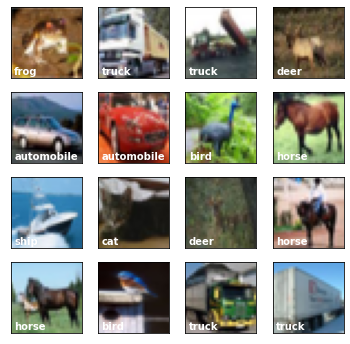

In [7]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 4, 
                         figsize=(6, 6),
                         subplot_kw={'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_train_raw[i])
    
    act = class_labels[y_train_raw[i]]
    ax.text(0.05, 0.05, act, color='white', fontsize=10,
            weight='semibold', transform=ax.transAxes)

plt.show();

### Build a NN model with hidden layers

Before we start, we need to take a small digression. The keras Neural Network model training results are not easily reproducible since it involves a lot of shuffling and random initializations. In order to maintain consitency, we will have to initialize some random seeds before every model run. We will create a function to do this.

In [8]:
from tensorflow import random as tf_random
import numpy as np
import random

def init_seeds(s):
    '''
    Initializes random seeds prior to model training 
    to ensure reproducibality of training results.
    '''
    tf_random.set_seed(s)
    np.random.seed(s)
    random.seed(s)

Let's build a NN model with three hidden layers.

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten

# initialize seeds
init_seeds(314)

# prepare the model architecture
mlp1 = Sequential(
    [
        Flatten(input_shape=(32, 32, 3)),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ], 
    name='mlp_3hidden')

mlp1.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

# fit and validate the model
mlp1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, shuffle=True);

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 2.1354 - accuracy: 0.2089 - val_loss: 1.9127 - val_accuracy: 0.3132
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8852 - accuracy: 0.3201 - val_loss: 1.8571 - val_accuracy: 0.3331
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8119 - accuracy: 0.3493 - val_loss: 1.7806 - val_accuracy: 0.3669
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7594 - accuracy: 0.3705 - val_loss: 1.7696 - val_accuracy: 0.3660
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7119 - accuracy: 0.3893 - val_loss: 1.7811 - val_accuracy: 0.3684
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6927 - accuracy: 0.3971 - val_loss: 1.6763 - val_accuracy: 0.4011
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6519 - accuracy: 0.4114 - val_loss: 1.6937 - val_accuracy:

These results don't look very good. Let's try to add more neurons to the hidden nodes.

* Supplimentary Resource:
    * [Early-stopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)    
* Reflections:
    * [What is the difference between `sparse_categorical_crossentropy` and `categorical_crossentropy`?](https://stackoverflow.com/questions/58565394/what-is-the-difference-between-sparse-categorical-crossentropy-and-categorical-c)

In [10]:
# initialize seeds
init_seeds(314)

mlp2 = Sequential(
    [
        Flatten(input_shape=(32, 32, 3)),
        Dense(1024, activation='relu'),
        Dense(1024, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ], 
    name='mlp_3hidden_v2')

mlp2.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

mlp2.fit(X_train, y_train, epochs=5, shuffle=True);

Epoch 1/5
1563/1563 [==============================] - 20s 13ms/step - loss: 2.2232 - accuracy: 0.1578
Epoch 2/5
1563/1563 [==============================] - 20s 13ms/step - loss: 1.9515 - accuracy: 0.2914
Epoch 3/5
1563/1563 [==============================] - 20s 13ms/step - loss: 1.8451 - accuracy: 0.3377
Epoch 4/5
1563/1563 [==============================] - 20s 13ms/step - loss: 1.7865 - accuracy: 0.3572
Epoch 5/5
1563/1563 [==============================] - 20s 13ms/step - loss: 1.7420 - accuracy: 0.3787


Again, the NN model is not able to achieve high accuracy. We could try more complicated models but there's a better way to improve the model --> CNN!

### Build a Convolutional Neural Network (CNN) model

In [11]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# initialize seeds
init_seeds(314)

cnn = Sequential(
    [
        Conv2D(filters=32, 
               kernel_size=(3, 3), 
               activation='relu', 
               input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ], 
    name='cnn')

cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

cnn.fit(X_train, y_train, epochs=10, shuffle=True);

Epoch 1/10
1563/1563 [==============================] - 26s 16ms/step - loss: 1.8332 - accuracy: 0.3328
Epoch 2/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.2595 - accuracy: 0.5550
Epoch 3/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.0631 - accuracy: 0.6263
Epoch 4/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.9192 - accuracy: 0.6799
Epoch 5/10
1563/1563 [==============================] - 24s 16ms/step - loss: 0.7826 - accuracy: 0.7262
Epoch 6/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.6719 - accuracy: 0.7625
Epoch 7/10
1563/1563 [==============================] - 24s 16ms/step - loss: 0.5420 - accuracy: 0.8128
Epoch 8/10
1563/1563 [==============================] - 24s 16ms/step - loss: 0.4438 - accuracy: 0.8485
Epoch 9/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.3347 - accuracy: 0.8855
Epoch 10/10
1563/1563 [==============================] - 24s 15m

In [12]:
loss, accuracy = cnn.evaluate(X_test, y_test)
print(f'Loss: {loss:.2%}, Accuracy: {accuracy:.2%}')

313/313 [==============================] - 2s 4ms/step - loss: 1.5280 - accuracy: 0.6247
Loss: 152.80%, Accuracy: 62.47%


Further fine-tuning would improve the model accuracy. For now, let's proceed with this model.

* Reflections:
    * [How to avoid overfitting in Deep Learning Neural Networks?](https://machinelearningmastery.com/introduction-to-regularization-to-reduce-overfitting-and-improve-generalization-error/)
    * [Something that bothers me about deep neural nets.](https://www.johndcook.com/blog/2017/10/09/something-that-bothers-me-about-deep-neural-nets/)

In [13]:
# predicted probabilities for each class
probs = cnn.predict(X_test)
probs[:3]

array([[5.5219402e-06, 3.0044134e-07, 3.6938129e-06, 9.9915314e-01,
        1.8053354e-06, 2.7639178e-05, 8.0603611e-04, 1.0302454e-06,
        6.6384439e-07, 1.5137786e-07],
       [8.5989981e-05, 9.8766625e-01, 1.9026415e-10, 3.6050038e-11,
        4.0850702e-13, 2.7019229e-12, 6.0766127e-12, 2.1792725e-14,
        1.2240409e-02, 7.3355091e-06],
       [4.2748496e-02, 1.2579081e-02, 3.4036458e-02, 4.5156977e-03,
        2.9949070e-04, 4.1742786e-03, 6.8954134e-05, 7.6440508e-03,
        8.9147723e-01, 2.4562627e-03]], dtype=float32)

In [14]:
# grab the predictions (predicted labels) from the model
preds = [class_labels[np.argmax(p)] for p in probs]
preds[:3]

['cat', 'automobile', 'ship']

## Miscellaneous Items

### Visualize the predictions

In [15]:
_, axes = plt.subplots(10, 10, figsize=(12, 12))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_test_raw[i])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    pred = preds[i]
    act = class_labels[y_test_raw[i]]
    if pred == act:
        ax.text(0.05, 0.05, preds[i], color='white',
                weight='semibold', transform=ax.transAxes)
    else:
        ax.text(0.05, 0.05, preds[i], color='tomato',
                weight='semibold', transform=ax.transAxes)
plt.show();

## Exercises:

**Exercise 1:** Try different hyper-parameters to improve the model accuracy. 

**Exercise 2:** Capture the "history" of model fitting (i.e., the output of the `model.fit()` function) and plot (1) model accuracy, (2) validation accuracy, (3) model loss, and (4) validation loss, using `matplotlib`. (You can use `epoch` for the x-axis and put `accuracy` (or `loss`) on the y-axis.)